In [1]:
import csv
import numpy as np
import scipy as sp
import astropy as ap
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate 
from astropy.cosmology import WMAP9 #import relevant cosmology (find way to automate this for each dataset)
import math

In [2]:
#Define useful parameters

no_of_bins = 100
survey_area = 4

In [3]:
#Read in dataset

data_0 = pd.read_csv("tao_aponte_01_catalogue_3963.csv")
data_0

,Total_Stellar_Mass,Bulge_Stellar_Mass,Black_Hole_Mass,Cold_Gas_Mass,Hot_Gas_Mass,Ejected_Gas_Mass,Intracluster_Stars_Mass,Metals_Total_Stellar_Mass,Metals_Bulge_Mass,Metals_Cold_Gas_Mass,...,Snapshot_Number,Galaxy_ID,Central_Galaxy_ID,Simulation_Halo_ID,Keck_DEIMOS_DEEP_B_Absolute,Keck_DEIMOS_DEEP_B_Apparent,Keck_DEIMOS_DEEP_R_Absolute,Keck_DEIMOS_DEEP_R_Apparent,Keck_DEIMOS_DEEP_I_Absolute,Keck_DEIMOS_DEEP_I_Apparent
0,0.379666,0.000000,0.000000,0.388483,0.597879,0.922215,0.037507,0.003583,0.000000,0.004832,...,39,467002712000000000,467002712000000000,2946268972,-20.5679,24.2341,-20.8923,24.0621,-21.0405,23.6940
1,0.136539,0.000000,0.000000,0.858644,0.880154,0.446934,0.134356,0.000866,0.000000,0.003344,...,39,467002819000000000,467002819000000000,2938917265,-19.7931,24.4250,-19.9850,24.5366,-20.0706,24.3189
2,0.294770,0.051038,0.000101,0.684603,0.741515,0.706550,0.000000,0.001821,0.000311,0.004407,...,39,467002825000000000,467002825000000000,2939169738,-20.5011,23.8641,-20.6548,23.9137,-20.7294,23.6595
3,0.014943,0.000000,0.000000,0.030843,0.000000,0.181472,0.000000,0.000076,0.000000,0.000210,...,39,467000635000000013,467000635000000013,2938917354,-16.3827,30.0040,-16.9026,28.9767,-17.0557,28.1390
4,0.065332,0.000000,0.000000,0.087791,0.000798,0.559373,0.000000,0.000383,0.000000,0.000820,...,39,467000635000000012,467000635000000012,2938917355,-18.7029,25.7607,-18.9291,25.7635,-19.0260,25.4666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827971,1.990170,0.457452,0.000897,0.150992,12.166300,0.007979,0.659508,0.025149,0.005730,0.001174,...,57,113013364000000000,113013364000000000,4898720574,-19.4465,20.8083,-20.5662,18.9887,-20.9025,18.6181
827972,1.981850,0.971344,0.000770,0.018918,1.709370,1.652110,0.055369,0.025811,0.012004,0.000270,...,57,113013786000000000,113013786000000000,4903420208,-20.3681,19.8176,-21.3317,18.2022,-21.6289,17.8772
827973,0.256673,0.000000,0.000000,0.174229,0.000000,0.000000,0.000000,0.002342,0.000000,0.002468,...,57,113013388000000004,113013388000000000,4903418589,-17.7280,22.3944,-18.6977,20.8304,-18.9934,20.5002
827974,0.014744,0.000000,0.000000,0.065355,0.000000,0.082336,0.000000,0.000046,0.000000,0.000363,...,57,113021403000000000,113021403000000000,4900979472,-16.9771,22.6615,-17.1878,22.1179,-17.2654,22.0293


In [4]:
#Sort dataset by redshift by low to high

data = data_0.sort_values('Redshift_Observed')
data[('Redshift_Observed')]

160095    0.014090
217670    0.014421
217671    0.014884
217668    0.014949
217674    0.015225
            ...   
482401    1.205740
382182    1.206080
577975    1.206100
578036    1.206300
578008    1.206380
Name: Redshift_Observed, Length: 827976, dtype: float64

In [5]:
z = data['Redshift_Observed']
magB= data['Keck_DEIMOS_DEEP_B_Apparent']
k = 50

magB = np.array(magB)
print(magB)
idx = np.argpartition(magB, k)
#print(idx)
print(magB[idx[:k]])
B_background = np.mean(magB[idx[:k]])
print(B_background)

[18.6977 17.053  18.1613 ... 27.5047 28.6207 25.7948]
[15.3978 15.3157 14.879  15.1717 12.8677 15.176  15.7538 14.7355 15.6083
 15.4037 15.7217 15.172  14.879  15.2835 14.7042 15.5459 15.599  15.5183
 15.2835 15.3163 14.2856 14.7633 15.5472 15.4985 15.5899 14.7355 15.7125
 15.8051 15.826  16.0443 15.9119 15.8253 15.9119 16.0067 15.9461 16.0472
 15.8578 15.9298 15.8801 16.0062 15.8653 15.8552 16.0952 16.1067 16.1067
 16.0977 16.176  16.1851 16.1898 16.1067]
15.544958000000001


(0.0, 0.1)

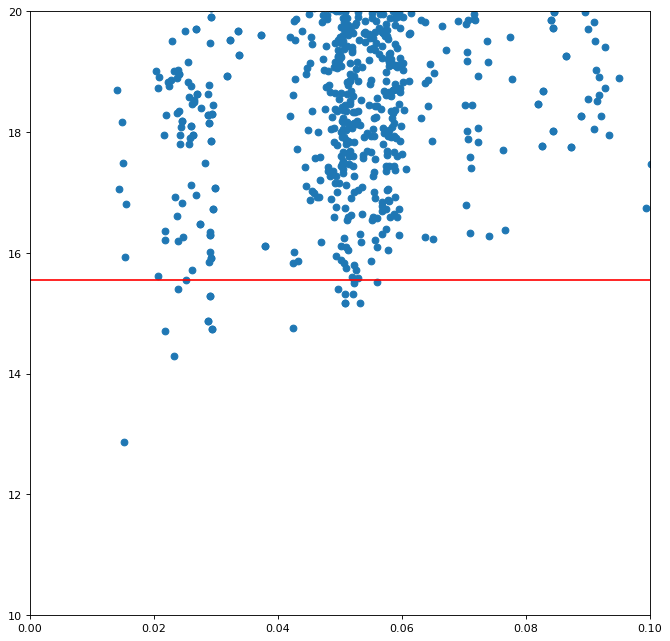

In [6]:
plt.figure(figsize=(10, 10), dpi=80)

plt.scatter(z, magB)
plt.axhline(y = B_background, color = 'r', linestyle = '-')
plt.ylim(10, 20)
plt.xlim(0, 0.1)

In [7]:
z = data['Redshift_Observed']
magR = data['Keck_DEIMOS_DEEP_R_Apparent']
k = 50

magR = np.array(magR)
print(magR)
idx = np.argpartition(magR, k)
#print(idx)
print(magR[idx[:k]])
R_background = np.mean(magR[idx[:k]])
print(R_background)

[17.7737 16.321  17.1884 ... 27.4562 28.0104 25.708 ]
[14.1372 14.3211 14.433  14.149  12.0915 14.149  14.3507 14.2345 14.3092
 14.1364 13.7357 14.1002 14.2952 14.433  14.7082 14.6724 14.65   14.65
 14.6578 14.5446 14.5367 14.8377 14.7694 14.7563 14.846  14.8741 14.6957
 14.4454 14.8127 14.9028 15.1153 15.1567 15.1053 15.161  14.9985 15.1815
 15.1328 15.1051 15.1531 15.1051 15.1963 15.0683 15.0591 14.9863 15.0546
 15.2272 15.2393 15.246  15.246  15.2472]
14.700404


(0.0, 0.1)

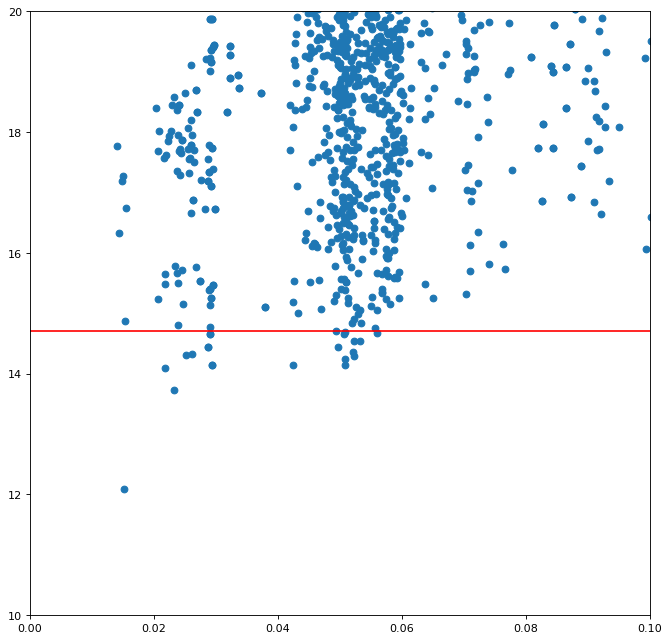

In [8]:
plt.figure(figsize=(10, 10), dpi=80)

plt.scatter(z, magR)
plt.axhline(y = R_background, color = 'r', linestyle = '-')
plt.ylim(10, 20)
plt.xlim(0, 0.1)

In [11]:
z = data['Redshift_Observed']
magI = data['Keck_DEIMOS_DEEP_I_Apparent']
k = 50

magI = np.array(magI)
print(magI)
idx = np.argpartition(magI, k)
#print(idx)
print(magI[idx[:k]])
I_background = np.mean(magI[idx[:k]])
print(I_background)

[17.5491 16.1113 16.9383 ... 27.0961 27.3175 25.3649]
[14.0169 13.9715 14.1073 14.3111 11.7785 14.2878 14.3888 14.2878 14.4047
 13.9444 13.9444 14.3317 13.8145 13.9039 13.8837 14.3087 13.9094 13.895
 13.9693 14.1866 13.5354 14.4212 14.6871 14.4212 14.4528 14.8004 14.5944
 14.5079 14.6158 14.7761 14.7761 14.7806 14.5843 14.5298 14.7918 14.7405
 14.6854 14.7686 14.8075 14.899  14.8837 14.8307 14.8299 14.8983 14.9108
 14.9293 14.9193 14.938  14.9526 14.959 ]
14.417469999999998


(0.0, 0.1)

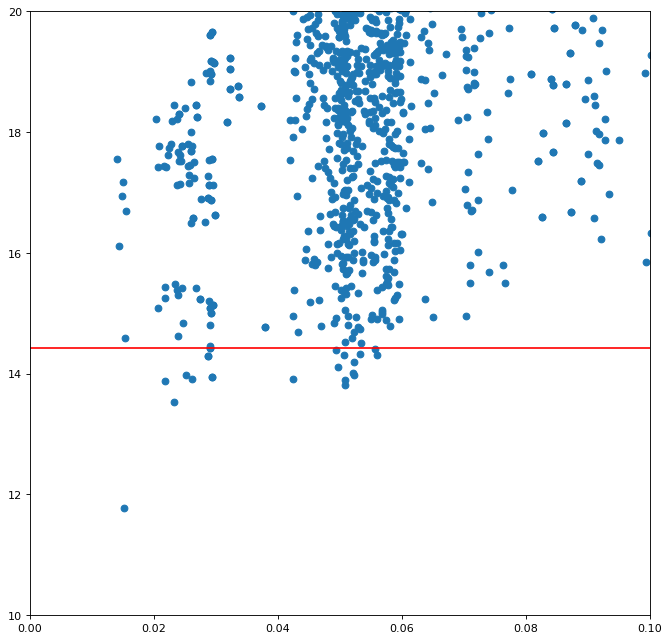

In [12]:
plt.figure(figsize=(10, 10), dpi=80)

plt.scatter(z, magI)
plt.axhline(y = I_background, color = 'r', linestyle = '-')
plt.ylim(10, 20)
plt.xlim(0, 0.1)